In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Exploring data and simple visualisations

In [3]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='charges'>

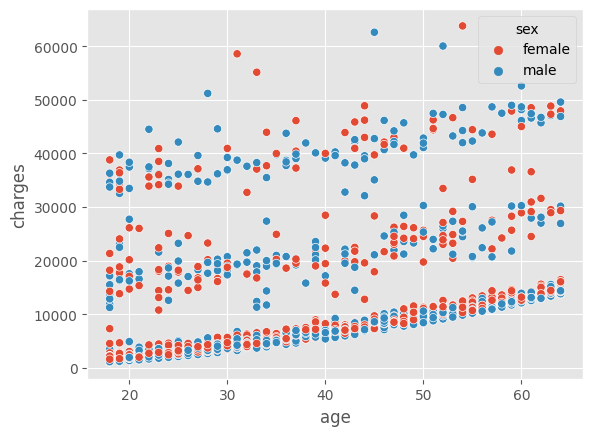

In [5]:
sns.scatterplot(data=data, x="age", y="charges", hue= 'sex')

<Axes: xlabel='bmi', ylabel='charges'>

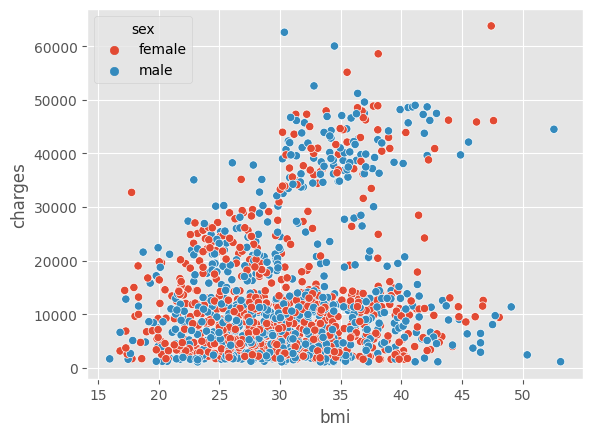

In [6]:
sns.scatterplot(data=data, x="bmi", y="charges", hue='sex')

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [9]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [10]:
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [11]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

## Feature Engg.

In [12]:
# Create interaction features
data['age_bmi_interaction'] = data['age'] * data['bmi']
data['age_smoker'] = data['age'] * data['smoker']

# Create polynomial features
data['age_squared'] = data['age'] ** 2
data['bmi_squared'] = data['bmi'] ** 2

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_bmi_interaction,age_smoker,age_squared,bmi_squared
0,19,0,27.900,0,1,1,16884.92400,530.100,19,361,778.410000
1,18,1,33.770,1,0,2,1725.55230,607.860,0,324,1140.412900
2,28,1,33.000,3,0,2,4449.46200,924.000,0,784,1089.000000
3,33,1,22.705,0,0,3,21984.47061,749.265,0,1089,515.517025
4,32,1,28.880,0,0,3,3866.85520,924.160,0,1024,834.054400


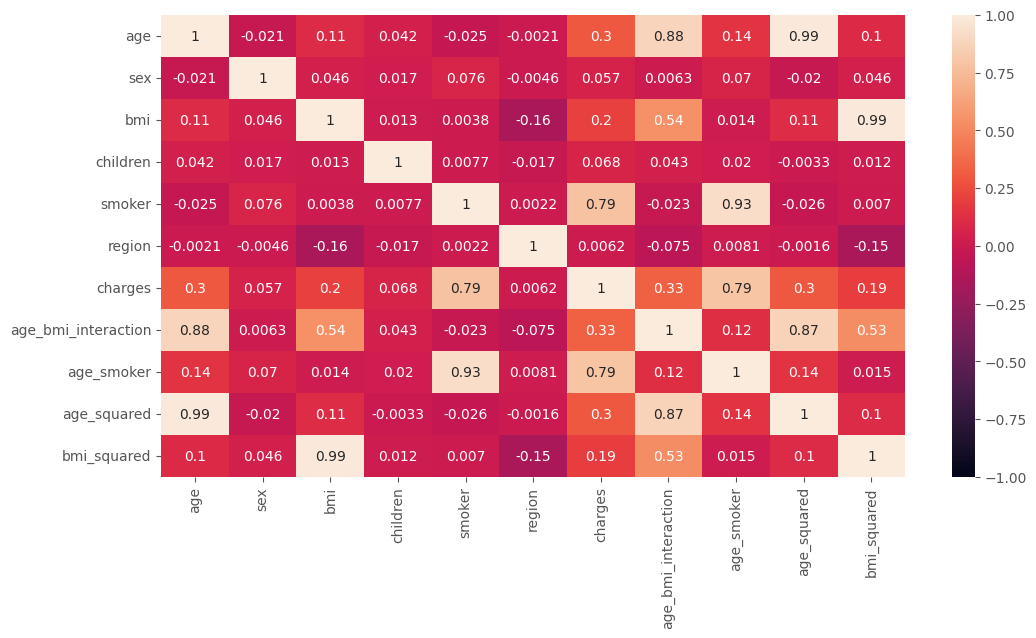

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

## Building the model

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,age,sex,bmi,children,smoker,region,age_bmi_interaction,age_smoker,age_squared,bmi_squared
560,46,0,19.950,2,0,3,917.70,0,2116,398.002500
1285,47,0,24.320,0,0,4,1143.04,0,2209,591.462400
1142,52,0,24.860,0,0,2,1292.72,0,2704,618.019600
969,39,0,34.320,5,0,2,1338.48,0,1521,1177.862400
486,54,0,21.470,3,0,3,1159.38,0,2916,460.960900
...,...,...,...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4,564.30,0,324,982.822500
1130,39,0,23.870,5,0,2,930.93,0,1521,569.776900
1294,58,1,25.175,0,0,4,1460.15,0,3364,633.780625
860,37,0,47.600,2,1,1,1761.20,37,1369,2265.760000


In [19]:
model = XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate = 0.09, max_depth = 3)

In [20]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [21]:
predictions = model.predict(X_test)

## Model Evaluation

In [22]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, predictions)
print('R2 score:', r2)

Mean Absolute Error: 2379.7347895973353
Mean Squared Error: 17518546.98483209
Root Mean Squared Error: 4185.516334316722
R2 score: 0.8871581956483787


### R2-score is fairly good since it explains 88.7% variance of the data while MAE, MSE and RMSE are higher than expected.

In [23]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### Note: will keep updating this notebook as I learn more methods to improve